In [30]:
import numpy as np
import pywt
import os
from PIL import Image
from scipy.fftpack import dct
from scipy.fftpack import idct
from urllib.request import urlretrieve
from PIL import Image
img=Image.open('imagetest1.jpg')
link1='https://www.ecdc.europa.eu/sites/default/files/styles/is_large/public/images/Coronavirus_H.png?itok=_QCjKfqJ'
link='https://ane4bf-datap1.s3-eu-west-1.amazonaws.com/wmocms/s3fs-public/styles/featured_media_detail/public/advanced_page/featured_media/coronavirus-banner.jpg?Q5nNiocqqI30_Jy2.RwhGYpwU7fNVCAp&itok=REf-9mAr'
urlretrieve(link,'imagetest1.jpg');
urlretrieve(link,'imagetest2.jpg');
urlretrieve(link1,'qrcodetest1.jpg');
image = 'imagetest1.jpg'   
watermark = 'qrcodetest1.jpg' 
def convert_image(image_name, size):
    img = Image.open('./' + image_name).resize((size, size), 1)
    img = img.convert('L')
    img.save('./' + image_name)

 
    image_array = np.array(img.getdata(), dtype=np.float).reshape((size, size))
    print(image_array[0][0])
    print(image_array[10][10])             

    return image_array

def process_coefficients(imArray, model, level):
    coeffs=pywt.wavedec2(data = imArray, wavelet = model, level = level)
    # print coeffs[0].__len__()
    coeffs_H=list(coeffs) 
   
    return coeffs_H


def embed_mod2(coeff_image, coeff_watermark, offset=0):
    for i in xrange(coeff_watermark.__len__()):
        for j in xrange(coeff_watermark[i].__len__()):
            coeff_image[i*2+offset][j*2+offset] = coeff_watermark[i][j]

    return coeff_image

def embed_mod4(coeff_image, coeff_watermark):
    for i in xrange(coeff_watermark.__len__()):
        for j in xrange(coeff_watermark[i].__len__()):
            coeff_image[i*4][j*4] = coeff_watermark[i][j]

    return coeff_image

            
    
def embed_watermark(watermark_array, orig_image):
    watermark_array_size = watermark_array[0].__len__()
    watermark_flat = watermark_array.ravel()
    ind = 0

    for x in range (0, orig_image.__len__(), 8):
        for y in range (0, orig_image.__len__(), 8):
            if ind < watermark_flat.__len__():
                subdct = orig_image[x:x+8, y:y+8]
                subdct[5][5] = watermark_flat[ind]
                orig_image[x:x+8, y:y+8] = subdct
                ind += 1 


    return orig_image
      


def apply_dct(image_array):
    size = image_array[0].__len__()
    all_subdct = np.empty((size, size))
    for i in range (0, size, 8):
        for j in range (0, size, 8):
            subpixels = image_array[i:i+8, j:j+8]
            subdct = dct(dct(subpixels.T, norm="ortho").T, norm="ortho")
            all_subdct[i:i+8, j:j+8] = subdct

    return all_subdct


def inverse_dct(all_subdct):
    size = all_subdct[0].__len__()
    all_subidct = np.empty((size, size))
    for i in range (0, size, 8):
        for j in range (0, size, 8):
            subidct = idct(idct(all_subdct[i:i+8, j:j+8].T, norm="ortho").T, norm="ortho")
            all_subidct[i:i+8, j:j+8] = subidct

    return all_subidct


def get_watermark(dct_watermarked_coeff, watermark_size):
    
    subwatermarks = []

    for x in range (0, dct_watermarked_coeff.__len__(), 8):
        for y in range (0, dct_watermarked_coeff.__len__(), 8):
            coeff_slice = dct_watermarked_coeff[x:x+8, y:y+8]
            subwatermarks.append(coeff_slice[5][5])

    watermark = np.array(subwatermarks).reshape(watermark_size, watermark_size)

    return watermark


def recover_watermark(image_array, model='haar', level = 1):


    coeffs_watermarked_image = process_coefficients(image_array, model, level=level)
    dct_watermarked_coeff = apply_dct(coeffs_watermarked_image[0])
    
    watermark_array = get_watermark(dct_watermarked_coeff, 128)

    watermark_array =  np.uint8(watermark_array)

#Save result
    img = Image.fromarray(watermark_array)
    img.save('./recovered_watermark.jpg')


def print_image_from_array(image_array, name):
  
    image_array_copy = image_array.clip(0, 255)
    image_array_copy = image_array_copy.astype("uint8")
    img = Image.fromarray(image_array_copy)
    img.save('./' + name)



def w2d(img):
    model = 'haar'
    level = 1
    image_array = convert_image(image, 2048)
    watermark_array = convert_image(watermark, 128)

    coeffs_image = process_coefficients(image_array, model, level=level)
    dct_array = apply_dct(coeffs_image[0])
    dct_array = embed_watermark(watermark_array, dct_array)
    coeffs_image[0] = inverse_dct(dct_array)
  

# reconstruction
    image_array_H=pywt.waverec2(coeffs_image, model)
    print_image_from_array(image_array_H, 'image_with_watermark.jpg')



# recover images
    recover_watermark(image_array = image_array_H, model=model, level = level)


w2d(img)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


23.0
23.0
87.0
96.0


In [31]:
import os

In [32]:
os.listdir('./')

['.config',
 'imagetest2.jpg',
 'qrcodetest1.jpg',
 '.ipynb_checkpoints',
 'image_with_watermark.jpg',
 'sample_data',
 'imagetest1.jpg',
 'recovered_watermark.jpg']

In [33]:
import matplotlib.pyplot as plt

In [34]:
from PIL import Image

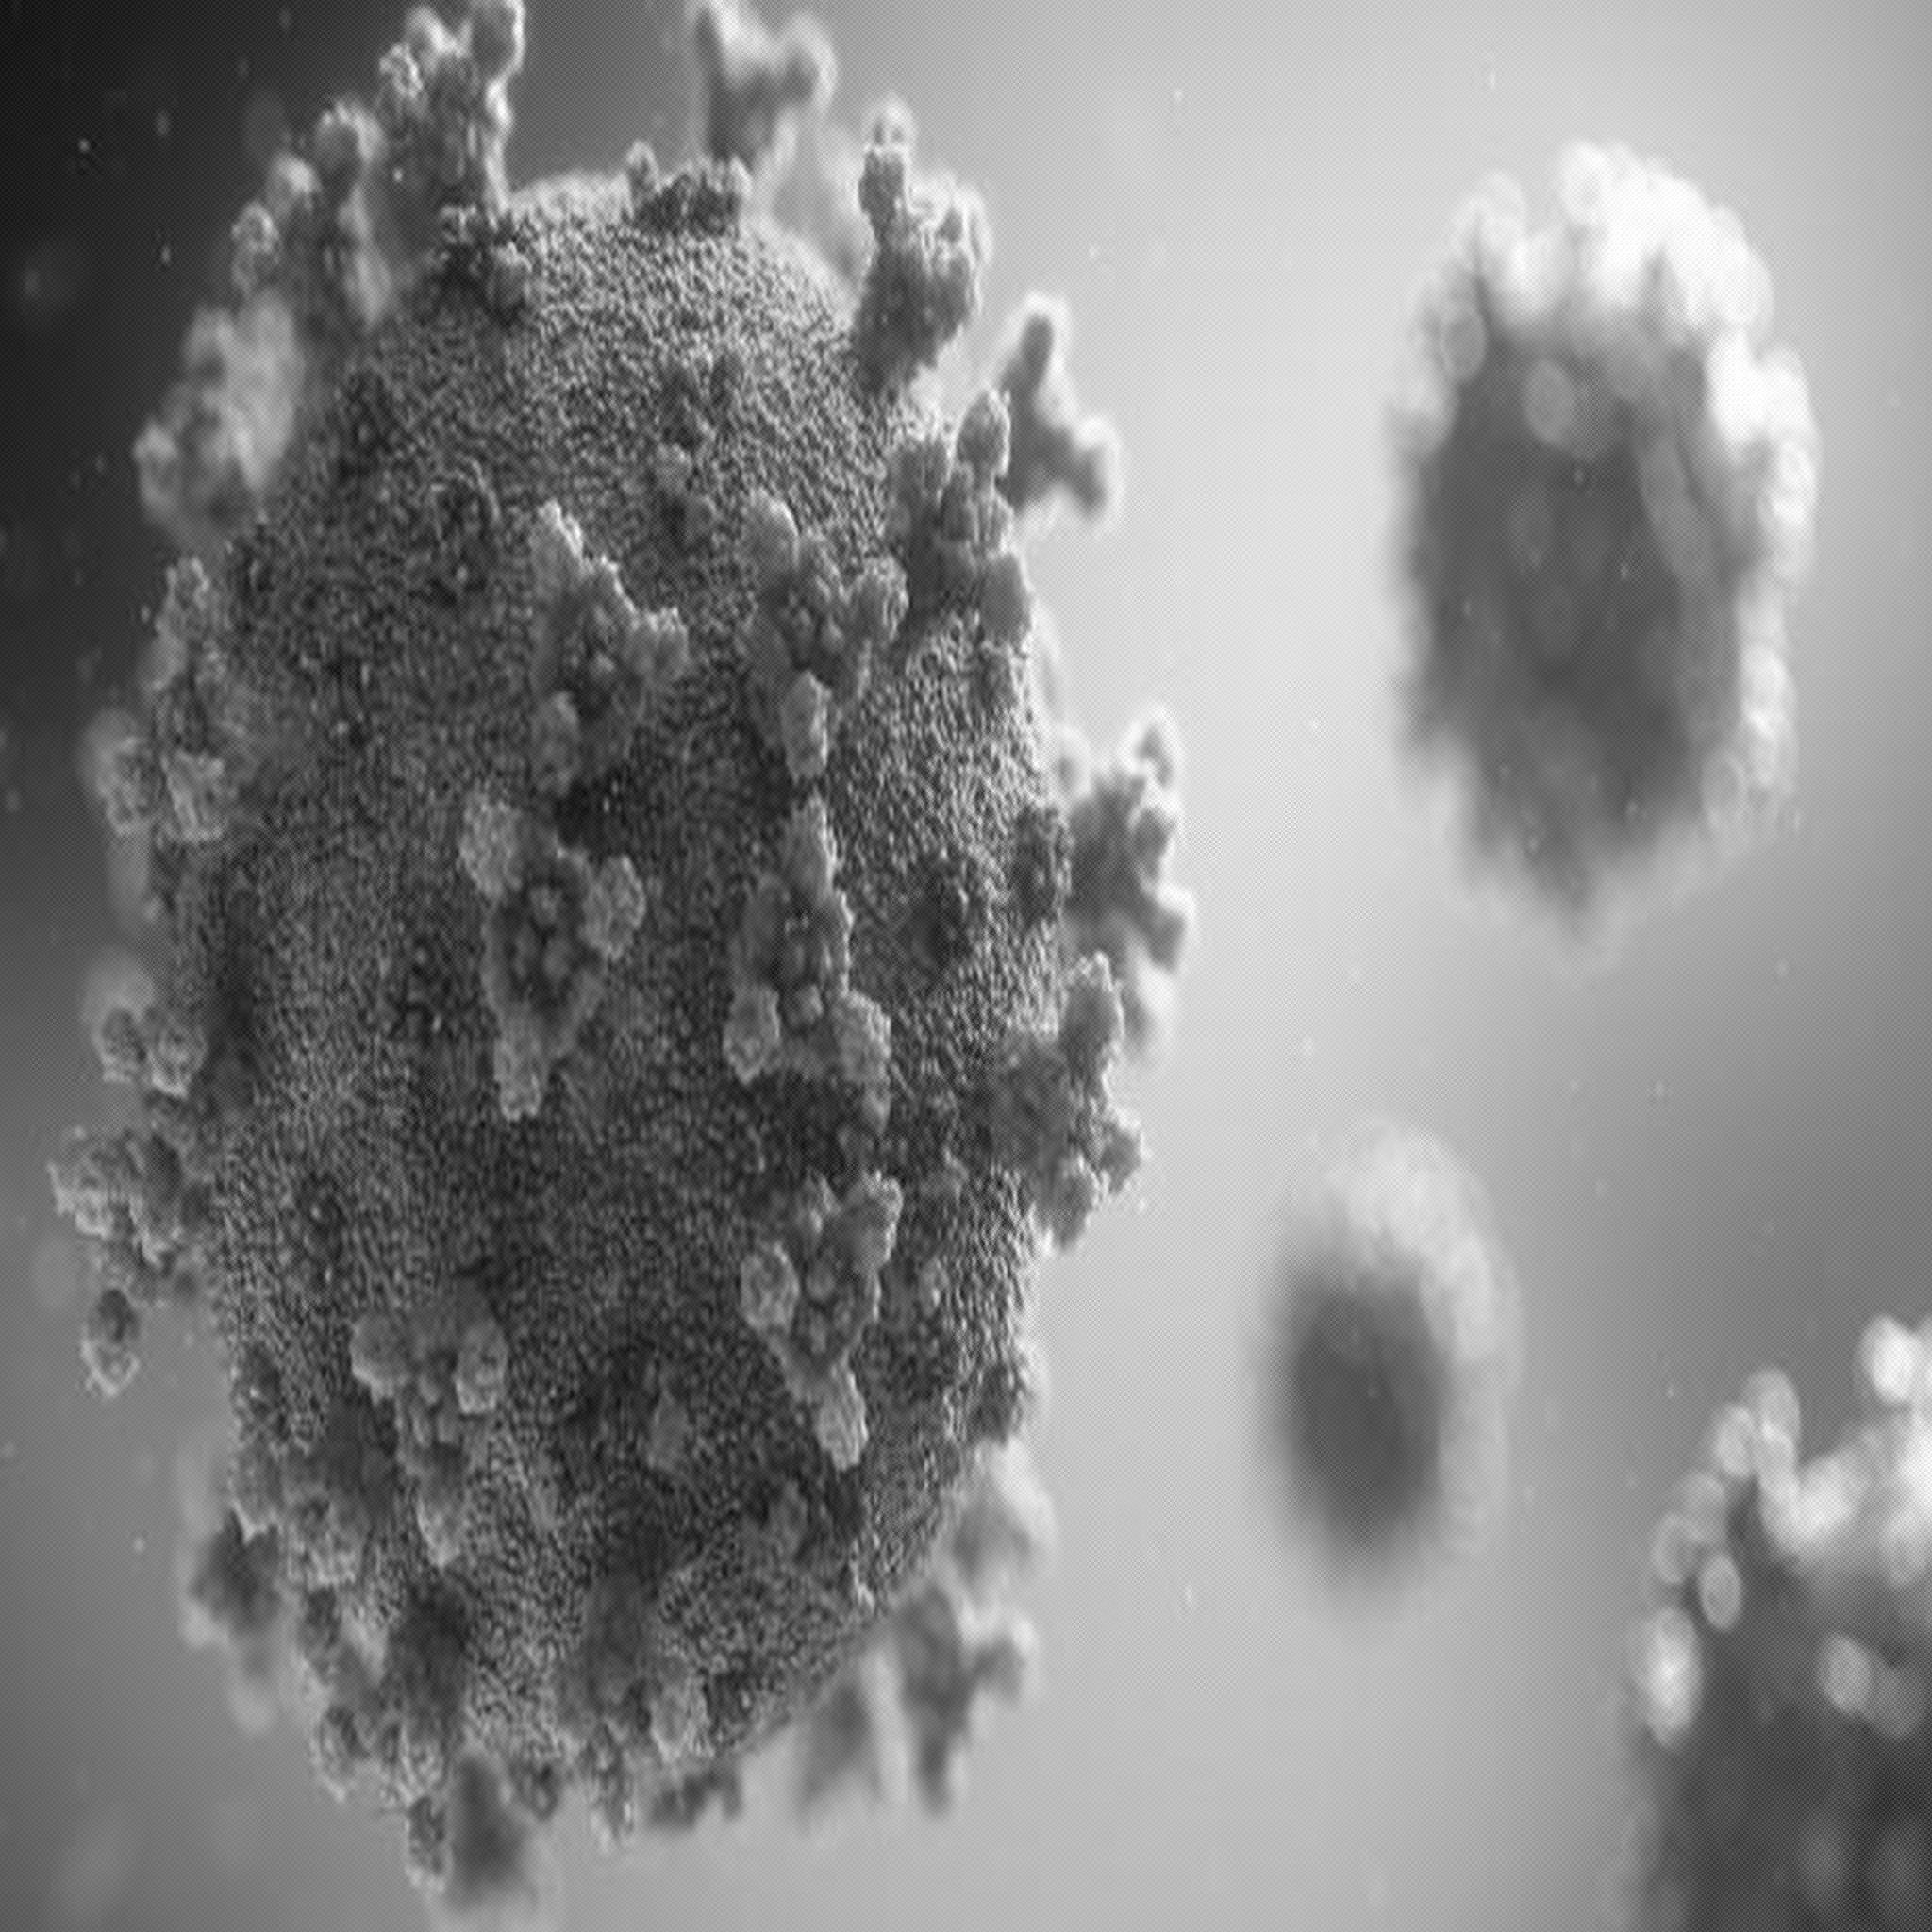

In [35]:
img1=Image.open('image_with_watermark.jpg')
img1

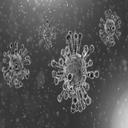

In [36]:
img2=Image.open('recovered_watermark.jpg')
img2

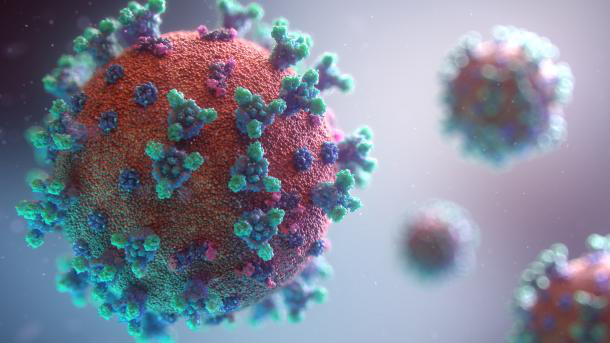

In [37]:
Image.open('imagetest2.jpg')